In [ ]:
#links
#https://www.discovery.co.za/wcm/discoverycoza/assets/medical-aid/benefit-information/2021/pmb-conditions-list-2021.pdf
#http://www0.sun.ac.za/aotc/icd10/mf_icd10_codelist.php?start=1
#https://bmcmedinformdecismak.biomedcentral.com/articles/10.1186/s12911-019-0734-y/tables/2

In [ ]:
#import some packages
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
from sklearn.metrics import confusion_matrix,roc_curve, roc_auc_score,accuracy_score
import seaborn as sns
#import scikitplot as skplt
from sklearn.model_selection import train_test_split as tts
from sklearn.ensemble import GradientBoostingClassifier as gbc

In [ ]:
Test=pd.read_csv('/content/drive/Shareddrives/KeyHealth/Data/Training_Testing/Complete_test_set.csv')
Train=pd.read_csv('/content/drive/Shareddrives/KeyHealth/Data/Training_Testing/Training_set.csv')

#Train.head(2)

In [ ]:
#Data Recieved:
#1. Members Auths
#2. Claims Data
#3. Beneficiary conditions
#4. Beneficiaries data

#Key Info required for the Hospital Admission
# 1. One year window period
# 2. Number of admissions in last 6 months prior to the window period
# 3. Number of medictaions used for the last three months before the window period
# 4. Number of ED visits for the last 6 months
# 5. Amount of money used by the patient for the last 12 months
# 6. Suffering from from a List of heart related Conditions (ICD10)
# 7. Age
# 8. Race
# 9. Province
# 10. Marital Status


In [ ]:
Train.columns

Index(['Member Number', 'Dependant', 'Gender', 'Age', 'Race', 'Mar Status',
       'Province', 'HYPERTEN', 'HYPERLIP', 'DIAB2', 'Asthma', 'CAD',
       'CARDIACF', 'Epilepsy', 'C902T', 'COPD', 'DIAB1', 'C900L', 'C209E',
       'CARDIMYO', 'C284E', 'C901A', 'C903E', 'C901E', 'C915E', 'C26E',
       'C314E', 'C907E', 'Cost12', 'No_meds', 'Total_services', 'Target'],
      dtype='object')

### Preprocessing the data

In [ ]:
#drop the questio mark in the Training, Mar status
Train1=Train[Train['Mar Status']!='?']

In [ ]:
#combine the two dataframes to do preprocessing
frames = [Train1,Test]
df_keys = pd.concat(frames,axis=0)

df_keys.shape

(47770, 32)

In [ ]:
#we start with dummies
Data=df_keys.drop('Target',axis=1)
Target=df_keys['Target']

In [ ]:
#gender
encoder=LabelEncoder()
Data['Gender']=encoder.fit_transform(Data['Gender'])

In [ ]:
Data2=pd.get_dummies(data=Data, columns=['Race', 'Mar Status','Province'])
Data2['Target']=Target
Data2.shape

(47770, 50)

In [ ]:
Train1=Data2[:23396]
Test1=Data2[23396:]

In [ ]:
Train3=Train1.dropna(axis=0)

In [ ]:
Train3.head()

,Member Number,Dependant,Gender,Age,HYPERTEN,HYPERLIP,DIAB2,Asthma,CAD,CARDIACF,...,Province_FREE STATE,Province_GAUTENG,Province_KWAZULU-NATAL,Province_LIMPOPO,Province_MPUMALANGA,Province_NORTH WEST,Province_NORTHERN CAPE,Province_OTHER,Province_WESTERN CAPE,Target
0,3563995.0,1.0,1,66.0,1,1,1,1,1,1,...,0,1,0,0,0,0,0,0,0,0
1,569855.0,2.0,0,70.0,1,1,0,1,0,1,...,1,0,0,0,0,0,0,0,0,0
2,3045760.0,1.0,1,80.0,1,1,1,0,1,1,...,0,1,0,0,0,0,0,0,0,0
3,3051192.0,1.0,1,79.0,1,1,0,1,1,1,...,0,1,0,0,0,0,0,0,0,0
4,3686051.0,2.0,0,62.0,1,1,1,0,0,1,...,0,1,0,0,0,0,0,0,0,0


In [ ]:
sum(Train3['Target'])

761

## Imbalance problem

Counter({0: 22635, 1: 761})


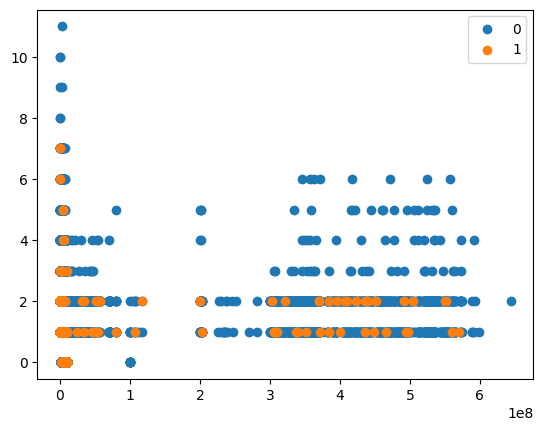

In [ ]:
# Generate and plot a synthetic imbalanced classification dataset
from collections import Counter
from sklearn.datasets import make_classification
from matplotlib import pyplot
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline
from numpy import where
# define dataset
X= Train3.drop('Target',axis=1).values
y=np.array(Train3.Target)
counter = Counter(y)
print(counter)
# scatter plot of examples by class label
for label, _ in counter.items():
	row_ix = where(y == label)[0]
	pyplot.scatter(X[row_ix, 0], X[row_ix, 1], label=str(label))
pyplot.legend()
pyplot.show()

Counter({0: 22635, 1: 22635})


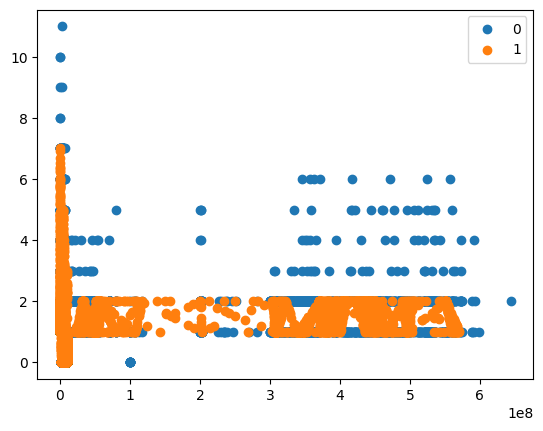

In [ ]:
over = SMOTE(sampling_strategy=1)
under = RandomUnderSampler(sampling_strategy=1)


steps = [('o', over), ('u', under)]
pipeline = Pipeline(steps=steps)

# transform the dataset
X, y = pipeline.fit_resample(X, y)
# summarize the new class distribution
counter = Counter(y)
print(counter)
# scatter plot of examples by class label
for label, _ in counter.items():
	row_ix = where(y == label)[0]
	pyplot.scatter(X[row_ix, 0], X[row_ix, 1], label=str(label))
pyplot.legend()
pyplot.show()


Counter({0: 4526, 1: 4526})

##Naive BAYES

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but GaussianNB was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


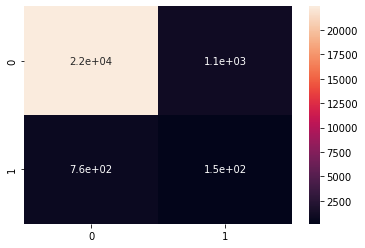

Accuracy 0.9250841060146058


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but GaussianNB was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


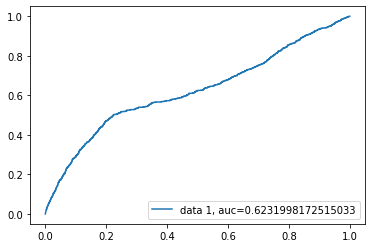

In [ ]:
# training the model on training set
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
# X_train=Train1.drop('Target',axis=1)
# y_train=Train1.Target
gnb.fit(X, y)

#test
X_test=Test1.drop('Target',axis=1)
y_test=Test1.Target

y_pred=gnb.predict(X_test)
cm=confusion_matrix(y_test, y_pred)
sns.heatmap(cm,annot=True)
plt.show()

print("Accuracy", accuracy_score(y_test, y_pred))
y_pred_proba = gnb.predict_proba(X_test)[::,1]
fpr, tpr, _ = roc_curve(y_test,  y_pred_proba)
auc = roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()


## Logistic Regression

In [ ]:
X_train=X
y_train=y
dat=np.hstack((X_train,y_train.reshape(y_train.shape[0],1)))
frame=pd.DataFrame(dat,columns=Train3.columns)
frame=frame.sample(frac=1)

In [ ]:
X_train.columns

Index(['Gender', 'Age', 'HYPERTEN', 'HYPERLIP', 'DIAB2', 'Asthma', 'CAD',
       'CARDIACF', 'Epilepsy', 'C902T', 'COPD', 'DIAB1', 'C900L', 'C209E',
       'CARDIMYO', 'C284E', 'C901A', 'C903E', 'C901E', 'C915E', 'C26E',
       'C314E', 'C907E', 'Cost12', 'No_meds', 'Total_services', 'Race_A',
       'Race_B', 'Race_C', 'Race_I', 'Race_U', 'Race_W', 'Mar Status_D',
       'Mar Status_M', 'Mar Status_P', 'Mar Status_S', 'Mar Status_W',
       'Province_EASTERN CAPE', 'Province_FREE STATE', 'Province_GAUTENG',
       'Province_KWAZULU-NATAL', 'Province_LIMPOPO', 'Province_MPUMALANGA',
       'Province_NORTH WEST', 'Province_NORTHERN CAPE', 'Province_OTHER',
       'Province_WESTERN CAPE'],
      dtype='object')

In [ ]:
fet=['Gender', 'Age', 'HYPERTEN', 'HYPERLIP', 'DIAB2', 'Asthma', 'CAD',
       'CARDIACF', 'Epilepsy', 'C902T', 'COPD', 'DIAB1', 'C900L', 'C209E',
       'CARDIMYO', 'C284E', 'C901A', 'C903E', 'C901E', 'C915E', 'C26E',
       'C314E', 'C907E', 'Cost12', 'No_meds', 'Total_services', 'Race_A',
       'Race_B', 'Race_C', 'Race_I', 'Race_U', 'Race_W', 'Mar Status_D',
       'Mar Status_M', 'Mar Status_P', 'Mar Status_S', 'Mar Status_W',
       'Province_EASTERN CAPE', 'Province_FREE STATE', 'Province_GAUTENG',
       'Province_KWAZULU-NATAL', 'Province_LIMPOPO', 'Province_MPUMALANGA',
       'Province_NORTH WEST', 'Province_NORTHERN CAPE', 'Province_OTHER',
       'Province_WESTERN CAPE']

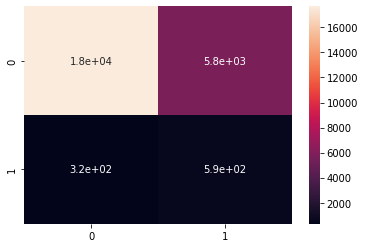

Accuracy 0.7494461311233281


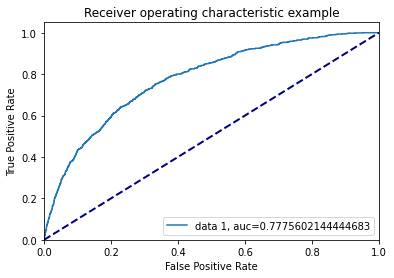

In [ ]:
# training the model on training set
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(max_iter=100,solver='liblinear',penalty='l1')

X_train=frame.drop(['Member Number','Dependant','Target'],axis=1)

y_train=frame.Target
lr.fit(X_train, y_train)
# get importance

#test
X_test=Test1.drop('Target',axis=1)
y_test=Test1.Target

y_pred=lr.predict(X_test[fet])
cm=confusion_matrix(y_test, y_pred)
sns.heatmap(cm,annot=True)
plt.show()

y_pred_proba = lr.predict_proba(X_test[fet])[::,1]
fpr, tpr, _ = roc_curve(y_test,  y_pred_proba)
auc = roc_auc_score(y_test, y_pred_proba)
print("Accuracy", accuracy_score(y_test, y_pred))
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))

plt.plot([0, 1], [0, 1], color="navy", lw=2, linestyle="--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver operating characteristic example")
plt.legend(loc="lower right")

plt.show()


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      0.75      0.85     23468
           1       0.09      0.65      0.16       906

    accuracy                           0.75     24374
   macro avg       0.54      0.70      0.51     24374
weighted avg       0.95      0.75      0.83     24374



## Gains from LR

In [ ]:
# get the total amount used on people who were admitted
amount=Test1.groupby(['Target']).agg({'Cost12':'sum'})
amount

,Cost12
Target,
0,1.018214e+09
1,1.032437e+08


In [ ]:
#This amount was used on
num_pple=sum(Test1.Target)
Model_pred=5.9e+02
No_pple=2.5e+03+Model_pred
frac=Model_pred/num_pple
Amnt=1.032437e+08*frac
print('Number of people being Monitored:',No_pple)
print('People admitted in the Target Year:',num_pple)
print('Number of people That the model predicted: ',Model_pred)
print('Fraction :',frac)
print('Amount that could have been saved :', int(Amnt))

Number of people being Monitored: 3090.0
People admitted in the Target Year: 906
Number of people That the model predicted:  590.0
Fraction : 0.6512141280353201
Amount that could have been saved : 67233756


## K-NN

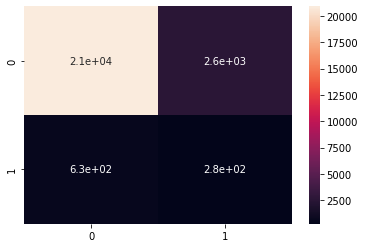

Accuracy 0.8689176991876589


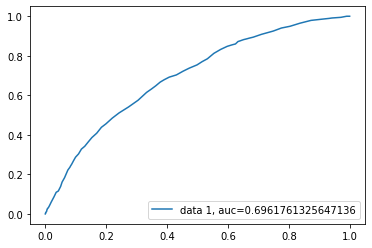

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
gnb = KNeighborsClassifier(n_jobs=-1,n_neighbors=100)
gnb.fit(X_train, y_train)

#test
X_test=Test1.drop(['Member Number','Dependant','Target'],axis=1)
y_test=Test1.Target

y_pred=gnb.predict(X_test)
cm=confusion_matrix(y_test, y_pred)
sns.heatmap(cm,annot=True)
plt.show()


y_pred_proba = gnb.predict_proba(X_test)[::,1]
fpr, tpr, _ = roc_curve(y_test,  y_pred_proba)
auc = roc_auc_score(y_test, y_pred_proba)
print("Accuracy", accuracy_score(y_test, y_pred))
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

## Decision Trees

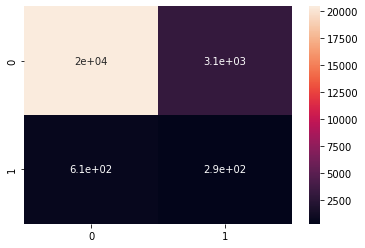

Accuracy 0.8494297201936489


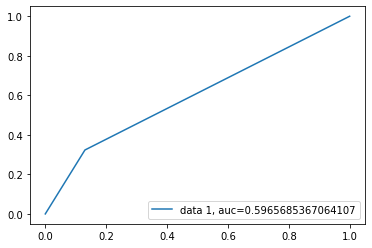

In [ ]:
from sklearn.tree import DecisionTreeClassifier
gnb = DecisionTreeClassifier(criterion='entropy',splitter='best',max_features='auto')
# X_train=Train1.drop('Target',axis=1)
# y_train=Train1.Target
gnb.fit(X_train, y_train)

#test
X_test=Test1.drop(['Member Number','Dependant','Target'],axis=1)
y_test=Test1.Target

y_pred=gnb.predict(X_test)
cm=confusion_matrix(y_test, y_pred)
sns.heatmap(cm,annot=True)
plt.show()

y_pred_proba = gnb.predict_proba(X_test)[::,1]
fpr, tpr, _ = roc_curve(y_test,  y_pred_proba)
auc = roc_auc_score(y_test, y_pred_proba)
print("Accuracy", accuracy_score(y_test, y_pred))
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()


In [ ]:
gnb?

#ensemble with bagging

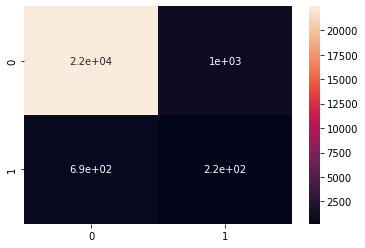

Accuracy 0.9297201936489702


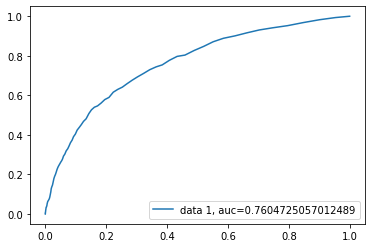

In [ ]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
# max_samples: maximum size 0.5=50% of each sample taken from the full dataset
# max_features: maximum of features 1=100% taken here all 10K
# n_estimators: number of decision trees
bg=BaggingClassifier(DecisionTreeClassifier(),max_samples=0.3,max_features=1.0,n_estimators=100)
bg.fit(X_train, y_train)

#test
X_test=Test1.drop(['Member Number','Dependant','Target'],axis=1)
y_test=Test1.Target

y_pred=bg.predict(X_test)
cm=confusion_matrix(y_test, y_pred)
sns.heatmap(cm,annot=True)
plt.show()

y_pred_proba = bg.predict_proba(X_test)[::,1]
fpr, tpr, _ = roc_curve(y_test,  y_pred_proba)
auc = roc_auc_score(y_test, y_pred_proba)
print("Accuracy", accuracy_score(y_test, y_pred))
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

## ensembe with Boosting

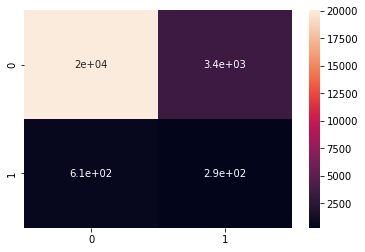

Accuracy 0.8342496102404201


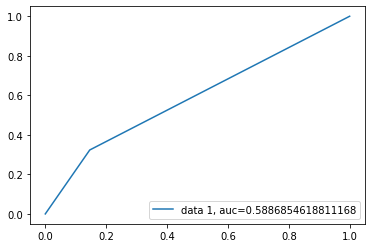

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
adb = AdaBoostClassifier(DecisionTreeClassifier(min_samples_split=2,max_depth=50),n_estimators=100,learning_rate=0.02)
adb.fit(X_train, y_train)

y_pred=adb.predict(X_test)
cm=confusion_matrix(y_test, y_pred)
sns.heatmap(cm,annot=True)
plt.show()

y_pred_proba = adb.predict_proba(X_test)[::,1]
fpr, tpr, _ = roc_curve(y_test,  y_pred_proba)
auc = roc_auc_score(y_test, y_pred_proba)
print("Accuracy", accuracy_score(y_test, y_pred))
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

# Random Forest

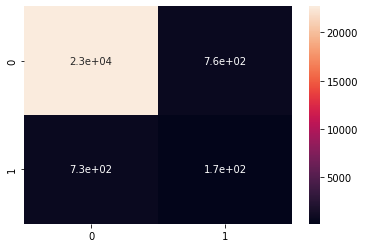

Accuracy 0.9387051776483137


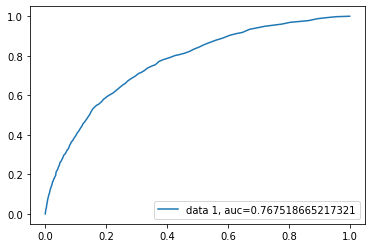

In [ ]:
from sklearn.ensemble import RandomForestClassifier# n_estimators = number of decision trees
rf = RandomForestClassifier(n_estimators=200)
rf.fit(X_train, y_train)

y_pred=rf.predict(X_test)
cm=confusion_matrix(y_test, y_pred)
sns.heatmap(cm,annot=True)
plt.show()

y_pred_proba = rf.predict_proba(X_test)[::,1]
fpr, tpr, _ = roc_curve(y_test,  y_pred_proba)
auc = roc_auc_score(y_test, y_pred_proba)
print("Accuracy", accuracy_score(y_test, y_pred))
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

## Gradient Boosting Technique

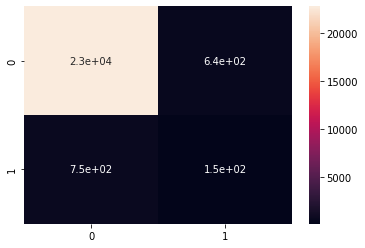

Accuracy 0.9427258554197095


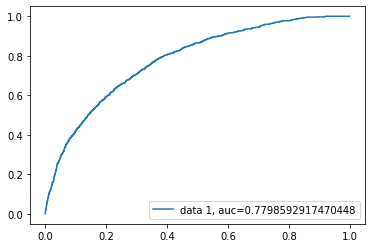

In [ ]:
model=gbc()
model.fit(X_train,y_train)
y_pred=model.predict(X_test).astype('int')
cm=confusion_matrix(y_test, y_pred)
sns.heatmap(cm,annot=True)
plt.show()

y_pred_proba = model.predict_proba(X_test)[::,1]
fpr, tpr, _ = roc_curve(y_test,  y_pred_proba)
auc = roc_auc_score(y_test, y_pred_proba)
print("Accuracy", accuracy_score(y_test, y_pred))
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

## NN

In [ ]:
X.shape

(9052, 49)

In [ ]:
X_train.shape

(9052, 47)

In [ ]:
import tensorflow as tf
#tf.set_random_seed(1234)

import keras
from keras.models import Sequential
from keras.layers import Dense
#from keras.layers import LSTM, SimpleRNN
from sklearn.metrics import mean_squared_error , accuracy_score


readmission = Sequential()
readmission.add(Dense(X_train.shape[0], activation='relu')),

readmission.add(Dense(2, activation='softmax'))

readmission.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

history=readmission.fit(X_train , y_train,validation_split=0.2 , epochs =25,verbose=1)

Epoch 1/25
227/227 [==============================] - 3s 10ms/step - loss: 1135.9346 - accuracy: 0.5385 - val_loss: 191.2592 - val_accuracy: 0.6278
Epoch 2/25
227/227 [==============================] - 4s 19ms/step - loss: 330.8417 - accuracy: 0.5774 - val_loss: 375.8175 - val_accuracy: 0.5511
Epoch 3/25
227/227 [==============================] - 3s 11ms/step - loss: 171.7818 - accuracy: 0.5792 - val_loss: 69.6915 - val_accuracy: 0.6400
Epoch 4/25
227/227 [==============================] - 2s 10ms/step - loss: 143.7998 - accuracy: 0.5785 - val_loss: 25.1552 - val_accuracy: 0.6400
Epoch 5/25
227/227 [==============================] - 2s 9ms/step - loss: 82.7723 - accuracy: 0.5890 - val_loss: 45.5112 - val_accuracy: 0.6300
Epoch 6/25
227/227 [==============================] - 2s 9ms/step - loss: 48.6589 - accuracy: 0.5925 - val_loss: 9.8016 - val_accuracy: 0.6483
Epoch 7/25
227/227 [==============================] - 2s 8ms/step - loss: 55.0766 - accuracy: 0.5817 - val_loss: 38.2044 - val

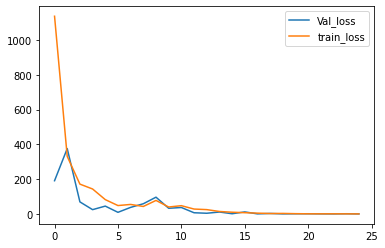

In [ ]:
##Plot the loss and accuracy
plt.plot(history.history['val_loss'],label='Val_loss')
plt.plot(history.history['loss'],label='train_loss')
plt.legend()
plt.show()

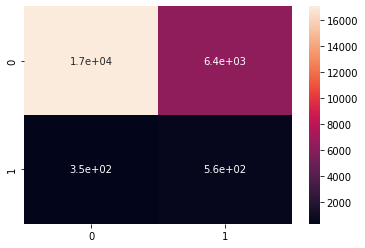

In [ ]:
y_pred=np.argmax(readmission.predict(X_test[fet]),axis=1)
cm=confusion_matrix(y_test, y_pred)
sns.heatmap(cm,annot=True)
plt.show()

In [ ]:
test_loss, test_acc = readmission.evaluate(X_test[fet],  y_test, verbose=2)

print('\nTest accuracy:', test_acc)

762/762 - 2s - loss: 1.1714 - accuracy: 0.7225 - 2s/epoch - 3ms/step

Test accuracy: 0.7224912047386169


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      0.73      0.83     23468
           1       0.08      0.61      0.14       906

    accuracy                           0.72     24374
   macro avg       0.53      0.67      0.49     24374
weighted avg       0.95      0.72      0.81     24374

